[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



Categorical: Gender
Quantitative: Weight of a person
Discrete: Number of kids in a family, can only be whole numbers
Continuous: Time spent doing something

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Carbon_West.dat',sep="\\s+")
carbon_west.head(10)

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2
5,Bulgaria,5.9
6,Canada,15.1
7,Croatia,4.0
8,Cyprus,5.3
9,Czech,9.2


Part a. Construct a histogram of CO2 emissions. 

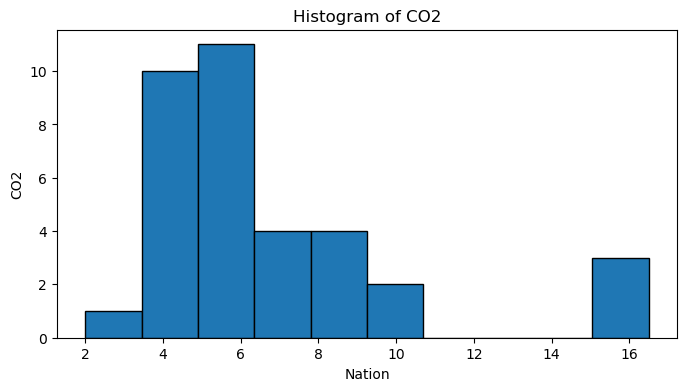

In [10]:
plt.figure(figsize=(8,4))
plt.hist(carbon_west['CO2'], bins=10, edgecolor='black')
plt.title(f"Histogram of CO2")
plt.xlabel("Nation")
plt.ylabel("CO2")
plt.show()

Part b. Find the mean, median, and standard deviation. 

In [12]:
mean_value = np.mean(carbon_west['CO2'])
median_value = np.median(carbon_west['CO2'])
standard_dev = np.std(carbon_west['CO2'])

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {standard_dev}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [16]:
murders = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Murder.dat", sep="\\s+")

Part a. Find the mean and standard deviation for murders without D.C.

In [17]:
murders_without_DC = murders[:50]
mean_value = np.mean(murders_without_DC['murder'])
standard_dev = np.std(murders_without_DC['murder'])

print(f"Mean Value: {mean_value}")
print(f"Standard Deviation: {standard_dev}")

Mean Value: 4.874
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C. 

In [18]:
murders_without_DC['murder'].describe()

count    50.000000
mean      4.874000
std       2.586291
min       1.000000
25%       2.625000
50%       4.850000
75%       6.175000
max      12.400000
Name: murder, dtype: float64

Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [19]:
median_value = np.median(murders_without_DC['murder'])
print(f"Mean Value W/Out DC: {mean_value}")
print(f"Median W/Out DC: {median_value}")
print("Five-Number Summary W/Out DC:")
print(f"{murders_without_DC['murder'].describe()}\n")

mean_value = np.mean(murders['murder'])
median_value = np.median(murders['murder'])

print(f"Mean Value with DC: {mean_value}")
print(f"Median with DC: {median_value}")
print("Five-Number Summary with DC:")
print(f"{murders['murder'].describe()}\n")

Mean Value W/Out DC: 4.874
Median W/Out DC: 4.85
Five-Number Summary W/Out DC:
count    50.000000
mean      4.874000
std       2.586291
min       1.000000
25%       2.625000
50%       4.850000
75%       6.175000
max      12.400000
Name: murder, dtype: float64

Mean Value with DC: 5.252941176470588
Median with DC: 5.0
Five-Number Summary with DC:
count    51.000000
mean      5.252941
std       3.725391
min       1.000000
25%       2.650000
50%       5.000000
75%       6.450000
max      24.200000
Name: murder, dtype: float64



**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [20]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head(10)

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
5,6,749.85,3153,1,2997,3,2
6,7,398.25,1355,0,4054,3,2
7,8,434.85,2075,1,3002,3,2
8,9,880.50,3990,0,6627,5,4
9,10,105.00,1160,0,320,3,2


Part a. Construct a scatterplot between square feet and price of a home. 

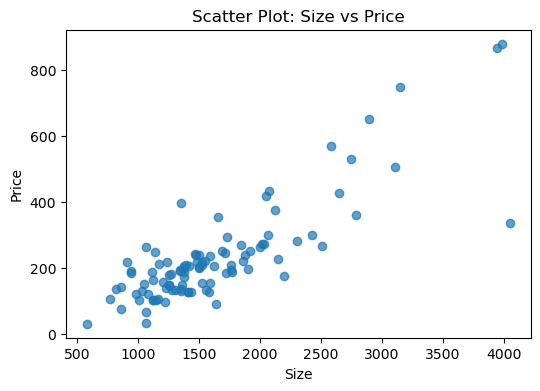

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(houses['size'],houses['price'],alpha=.7)
plt.title('Scatter Plot: Size vs Price')
plt.xlabel('Size')
plt.ylabel('Price')

plt.show()

Part b. Find the correlation between the two variables.

In [22]:
correlation = houses['size'].corr(houses['price'])

print(f"Correlation between Size and Price: {correlation}")

Correlation between Size and Price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot. 

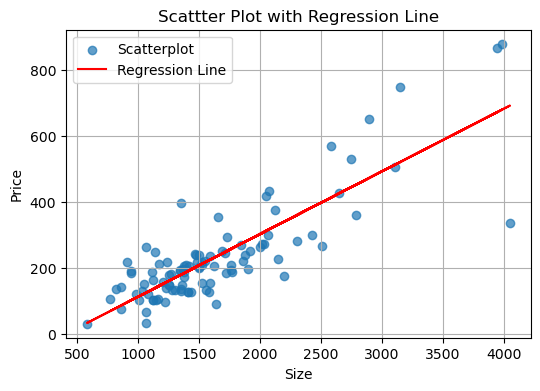

In [23]:
x = houses[['size']]
y = houses['price']

model = LinearRegression()

model.fit(x,y)

plt.figure(figsize=(6,4))
plt.scatter(x,y,alpha=0.7, label='Scatterplot')
plt.plot(x,model.predict(x),color='red',label='Regression Line')

plt.title('Scattter Plot with Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

<Figure size 800x600 with 0 Axes>

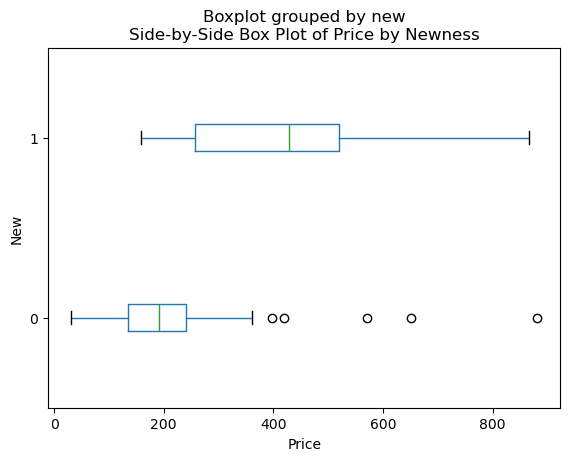

In [24]:
plt.figure(figsize=(8,6))
houses.boxplot(column='price', by='new', vert=False, grid=False)
plt.title('Side-by-Side Box Plot of Price by Newness')
plt.xlabel('Price')
plt.ylabel('New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a strong correlation between size and price. Generally speaking as the size of the home increases the price goes up as well. In the scatter plot we can see that most of the data is around the regression line which shows us that most of the data is correlated. It seems there is also strong correlation between newness and the overall price of a house. As we can see in the plot above the general price does correlate to the newness of the home as we can see in the double box plot that the new house data is generally more expensive, while older houses are generally cheaper but they do have outliers that are expensive.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [25]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep="\\s+")

In [26]:
pd.crosstab(happy['marital'],happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
